In [1]:
What is Customer Churn?
#Customer churn is defined as when customers or subscribers discontinue doing business with a firm or service.
#Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next. The telecommunications business has an annual churn rate of 15-25 percent in this highly competitive market.
#Individualized customer retention is tough because most firms have a large number of customers and can't afford to devote much time to each of them. 
#The costs would be too great, outweighing the additional revenue. However, if a corporation could forecast which customers are likely to leave ahead of time, it could focus customer retention efforts only on these "high risk" clients. 
#The ultimate goal is to expand its coverage area and retrieve more customers loyalty. The core to succeed in this market lies in the customer itself.
#Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers.

# To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.


Object `Churn` not found.


In [2]:
import numpy as np #To calculate the mean and standard deviation
import pandas as pd # To Manipulate the data 
import matplotlib.pyplot as plt # For visualization
%matplotlib inline
import seaborn as sns # For visualisation
from sklearn.tree import DecisionTreeClassifier #To build a classification tree
from sklearn.tree import plot_tree #To draw a tree
from sklearn.model_selection import train_test_split # to split data into training and testing sets
from sklearn.model_selection import cross_val_score #for cross validation
from sklearn.metrics import confusion_matrix #to create confusion matrix
from sklearn.metrics import plot_confusion_matrix # to plot the confusion matrix
from imblearn.over_sampling import SMOTE #Upsampling for imbalanced dataset
import warnings
warnings.filterwarnings('ignore')

### Import and warehouse data

In [3]:
tel = pd.read_csv('C:\\Users\\91879\\Downloads\\TelcomCustomer-Churn_1 (1).csv') #import the csv file
tel 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No
...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No


In [4]:
tel.shape #shape of dataset

(7043, 10)

In [5]:
tel1 = pd.read_csv("C:\\Users\\91879\\Downloads\\TelcomCustomer-Churn_2 (1).csv")
tel1

,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...
7038,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
tel1.size

77473

In [7]:
tel1.shape

(7043, 11)

In [8]:
tel2 = pd.read_csv('C:\\Users\\91879\\Downloads\\TelcomCustomer-Churn (2).csv')
tel2

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [9]:
tel2.size

147903

In [10]:
tel2.shape

(7043, 21)

In [11]:
tel2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### 2. Data Cleaning

In [12]:
tel2.dtypes # 'dtypes' is the datatype of variables

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
# The features are 18 categorical variables and 3 continuous variables, 

In [14]:
tel2['TotalCharges'] = tel2['TotalCharges'].replace(" ",0)
tel2['TotalCharges'] = pd.to_numeric(tel2.TotalCharges)

In [15]:
for features in tel2.columns:
    print(tel2[features].unique())
  

['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
['No' 'Yes']


### Missing values

#### Missing values is the blank space or surrogate value like NA
#### The biggest part of any data analysis project is making sure that the data is correctly formatted and fixing it when it is not. 
#### The first part of this process is identifying and dealing with missing data

In [16]:
tel2.isnull().sum() #missing values in features

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### There are no  missing values in the dataset

In [17]:
tel2.info() #data types of variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Data analysis and visualisation

In [18]:
tel2.describe().transpose() #summary statistics

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


### Data preprocessinng

In [19]:
tel2 = tel2.drop('customerID', axis = 1) # drop the feature 'customerID' which is irrelevant feature to predict target variable
tel2 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [20]:
tel2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
# Transforming the categorical data into numerical form
# This is because of the reason that Machine learning algorithms works well with data in numerical form
# sklearn decisiontree they do not natively support categorical data, hence need to use a trick which converts
# categorical data into multiple columns of binary values

tel2=pd.get_dummies(tel2, columns = ['MultipleLines','InternetService','Contract','PaymentMethod','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','gender'],drop_first = True )
tel2

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,...,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,gender_Male
0,0,Yes,No,1,No,Yes,29.85,29.85,No,1,...,1,0,0,0,0,0,0,0,0,0
1,0,No,No,34,Yes,No,56.95,1889.50,No,0,...,0,0,1,0,0,0,0,0,0,1
2,0,No,No,2,Yes,Yes,53.85,108.15,Yes,0,...,1,0,0,0,0,0,0,0,0,1
3,0,No,No,45,No,No,42.30,1840.75,No,1,...,0,0,1,0,1,0,0,0,0,1
4,0,No,No,2,Yes,Yes,70.70,151.65,Yes,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,24,Yes,Yes,84.80,1990.50,No,0,...,0,0,1,0,1,0,1,0,1,1
7039,0,Yes,Yes,72,Yes,Yes,103.20,7362.90,No,0,...,1,0,1,0,0,0,1,0,1,0
7040,0,Yes,Yes,11,No,Yes,29.60,346.45,No,1,...,0,0,0,0,0,0,0,0,0,0
7041,1,Yes,No,4,Yes,Yes,74.40,306.60,Yes,0,...,0,0,0,0,0,0,0,0,0,1


In [22]:
from sklearn.preprocessing import LabelEncoder # Label encoding is used to convert labels into numeric form where variables have
# order of preference
le = LabelEncoder()

tel2['Partner'] = le.fit_transform(tel2['Partner'])
tel2['Dependents'] = le.fit_transform(tel2['Dependents'])
tel2['PhoneService'] = le.fit_transform(tel2['PhoneService'])
tel2['PaperlessBilling'] = le.fit_transform(tel2['PaperlessBilling'])

In [23]:
tel2['Churn'].value_counts(normalize = True) #counting the 'yes' and 'no' class of target variable

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [24]:
# Split the data into independent(x) and dependent(y) variables
# X = The columns of data that we want to make classifications
# y = The column of data that we want to make prediction 
X = tel2.drop('Churn',axis = 1)
y = tel2['Churn']

## Build a preliminary classification tree


In [25]:
from sklearn.model_selection import train_test_split  

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42) #Split the data into train and test set

In [27]:
from sklearn.tree import DecisionTreeClassifier # To create and build a classification tree

In [28]:
model = DecisionTreeClassifier() # Create a decision tree

In [29]:
model.fit(X_train, y_train) # fit the model to training set

DecisionTreeClassifier()

In [30]:
y_prediction = model.predict(X_test)

In [31]:
y_prediction

array(['Yes', 'No', 'No', ..., 'No', 'Yes', 'No'], dtype=object)

In [32]:
y_test

185     Yes
2715     No
3825     No
1807    Yes
132      No
       ... 
5522    Yes
6377    Yes
5500     No
2392     No
6705     No
Name: Churn, Length: 2113, dtype: object

In [33]:
from sklearn.metrics import classification_report, plot_confusion_matrix #To measure the performance evaluation metrics 

In [34]:
print(classification_report(y_test,y_prediction)) # performance evaluation report

              precision    recall  f1-score   support

          No       0.81      0.82      0.82      1539
         Yes       0.51      0.49      0.50       574

    accuracy                           0.73      2113
   macro avg       0.66      0.66      0.66      2113
weighted avg       0.73      0.73      0.73      2113



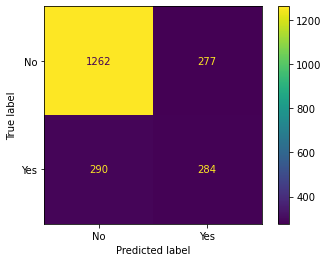

In [35]:
plot_confusion_matrix(model,X_test,y_test) # To visualize important predictive analytics like recall,precision, sensitivity and specificity

In [36]:
model.feature_importances_ # to know which features are most importannt

array([0.02172595, 0.02367918, 0.02257086, 0.20423494, 0.00473916,
       0.02210473, 0.19036932, 0.20449349, 0.00264135, 0.01424875,
       0.1026991 , 0.        , 0.01105347, 0.00878626, 0.01895423,
       0.02138187, 0.01172904, 0.        , 0.02414363, 0.        ,
       0.01458408, 0.        , 0.01175818, 0.        , 0.01583782,
       0.        , 0.00465523, 0.01202345, 0.00957854, 0.02200736])

In [37]:
X.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'gender_Male'],
      dtype='object')

In [38]:
from sklearn.tree import plot_tree

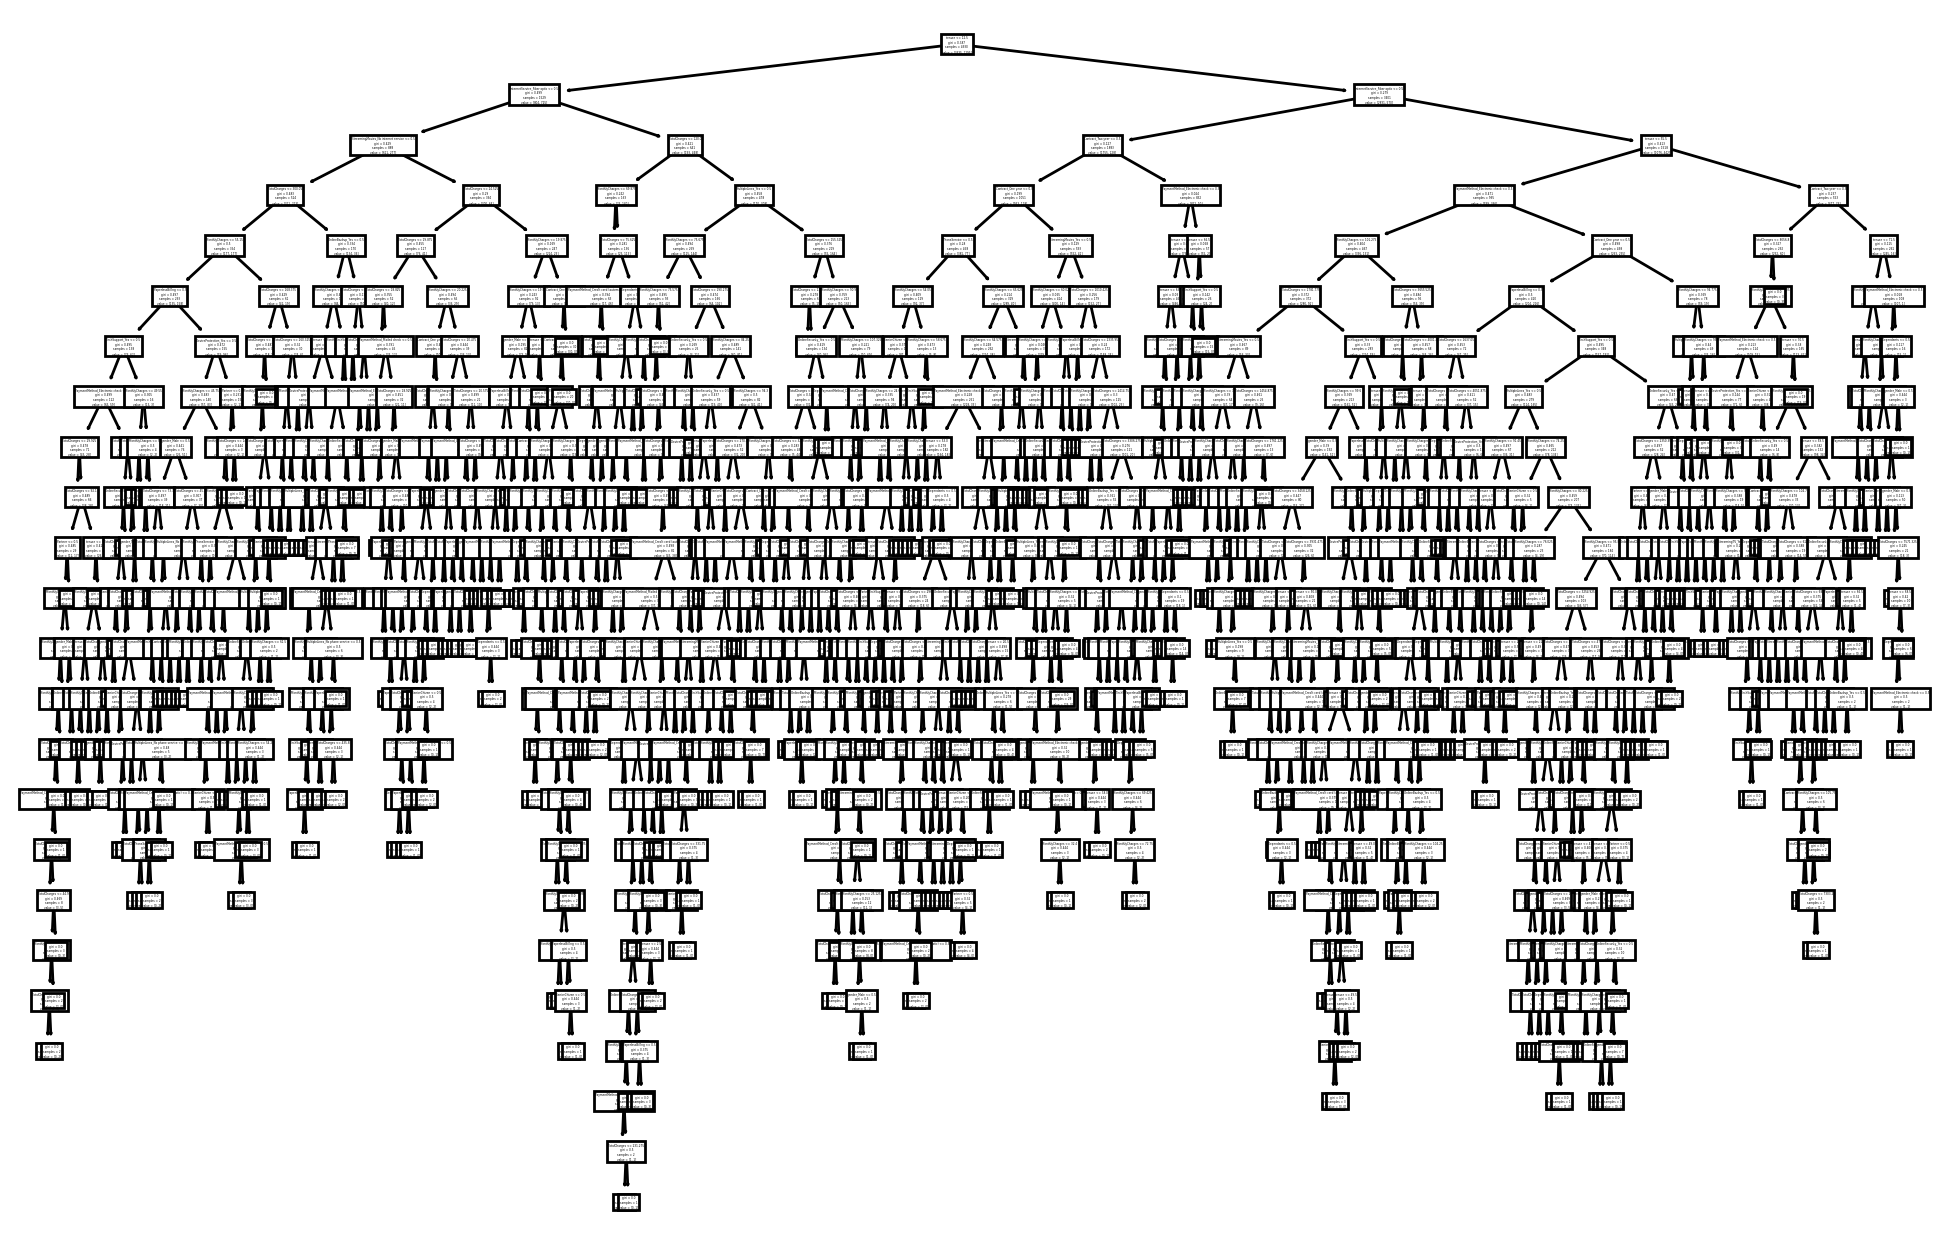

In [39]:
plt.figure(figsize = (12,8), dpi = 200)
plot_tree(model, feature_names = X.columns);

In [40]:
def report_model(model):
    y_prediction = model.predict(X_test)
    print(classification_report(y_test,y_prediction ))
    print('\n')
    plt.figure(figsize = (12,8), dpi = 200)
    plot_tree(model, feature_names = X.columns, filled = True);


              precision    recall  f1-score   support

          No       0.81      0.82      0.82      1539
         Yes       0.51      0.49      0.50       574

    accuracy                           0.73      2113
   macro avg       0.66      0.66      0.66      2113
weighted avg       0.73      0.73      0.73      2113





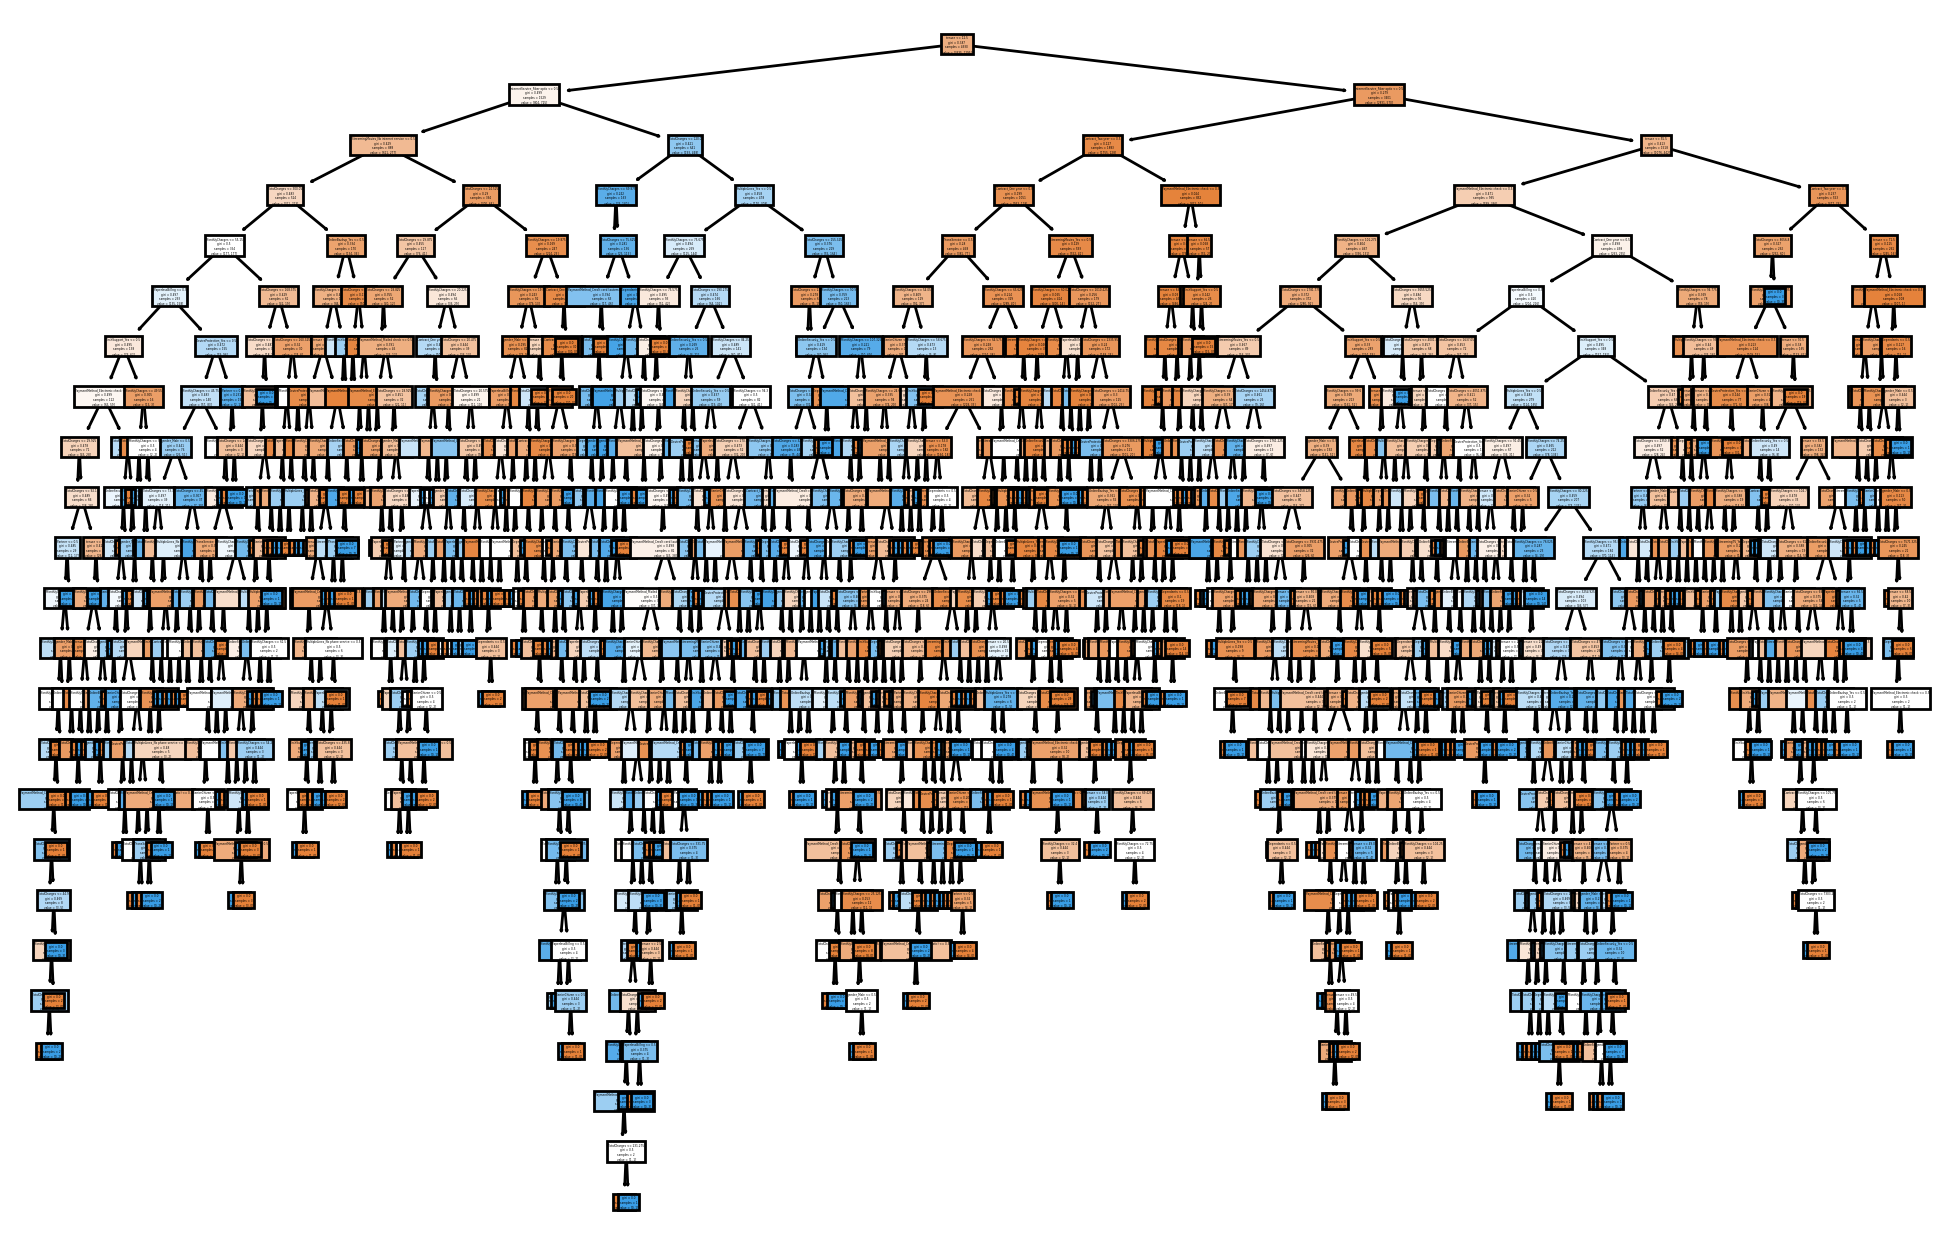

In [41]:
report_model(model)

In [42]:
pruned_tree = DecisionTreeClassifier(max_depth = 6,max_leaf_nodes = 10)

In [43]:
pruned_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10)

              precision    recall  f1-score   support

          No       0.79      0.94      0.86      1539
         Yes       0.70      0.34      0.46       574

    accuracy                           0.78      2113
   macro avg       0.75      0.64      0.66      2113
weighted avg       0.77      0.78      0.75      2113





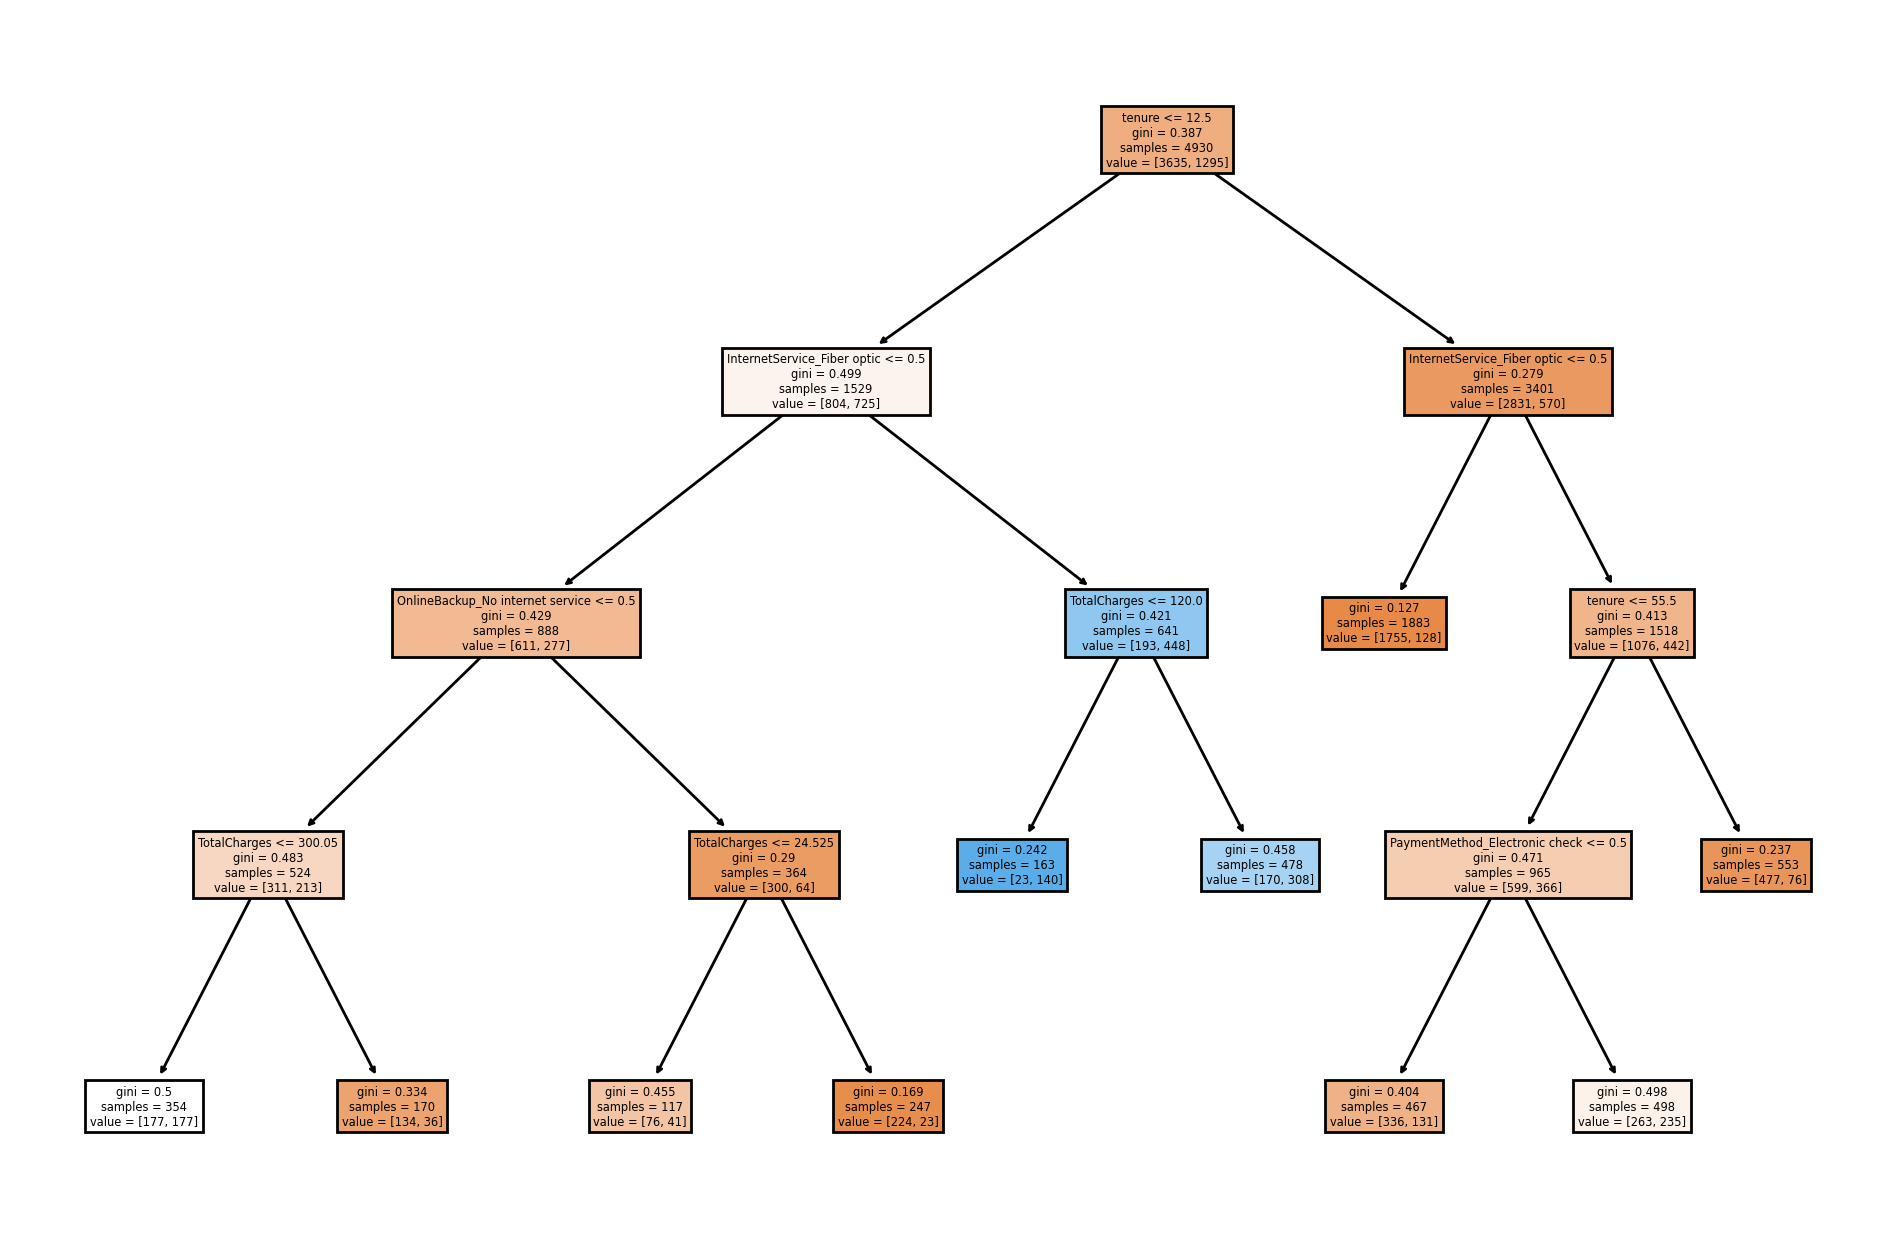

In [44]:
report_model(pruned_tree)

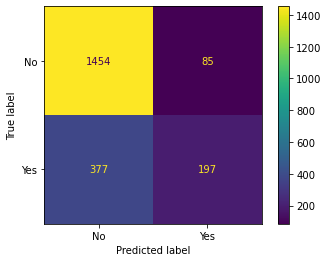

In [45]:
plot_confusion_matrix(pruned_tree, X_test, y_test);

In [46]:
model.score(X_train,y_train)

0.9983772819472616

In [47]:
model.score(X_test, y_test)

0.7316611452910554

In [48]:
pruned_tree.score(X_train, y_train)

0.7890466531440162

In [49]:
pruned_tree.score(X_test, y_test)

0.7813535257927118

### decision tree model has high amount of overfitting and hence reduces accuracy. after pruning accuracy has increased and there is well balance between test and train score.

### Random forest tree

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
n_estimators = [64,100, 128, 200]

In [54]:
max_features = [4,5,6]

In [55]:
bootstrap = [True, False]

In [56]:
oob_score = [True, False]

In [57]:
param_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'bootstrap': bootstrap,
               'oob_score': oob_score}

In [58]:
rfc = RandomForestClassifier()

In [59]:
grid = GridSearchCV(rfc, param_grid)

In [60]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [4, 5, 6],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [61]:
grid.best_params_

{'bootstrap': True, 'max_features': 5, 'n_estimators': 64, 'oob_score': True}

In [62]:
rfc = RandomForestClassifier(n_estimators = 200, max_features = 6, bootstrap = True, oob_score = True )

In [63]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_features=6, n_estimators=200, oob_score=True)

In [64]:
rfc.oob_score_

0.7858012170385396

In [65]:
y_prediction = rfc.predict(X_test)

In [66]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [67]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

          No       0.82      0.91      0.87      1539
         Yes       0.67      0.47      0.56       574

    accuracy                           0.79      2113
   macro avg       0.75      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113



In [68]:
rfc.score(X_train,y_train)

0.9983772819472616

In [69]:
rfc.score(X_test,y_test)

0.7946048272598202

#### accuracy by using random forest model is somewhat better than decision tree

### Adaboost (Adaptive boosting)

In [70]:
from sklearn.ensemble import AdaBoostClassifier

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)

In [72]:
ada = AdaBoostClassifier(n_estimators = 14)

In [73]:
ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=14)

In [74]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [75]:
test_predictions = ada.predict(X_test)

In [76]:
test_predictions

array(['Yes', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [77]:
print(classification_report(y_test, test_predictions));

              precision    recall  f1-score   support

          No       0.83      0.91      0.87      1539
         Yes       0.67      0.50      0.57       574

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113



In [78]:
ada.score(X_train,y_train)

0.7977687626774848

In [79]:
ada.score(X_test,y_test)

0.7969711310932324

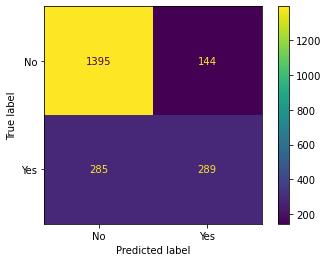

In [80]:
plot_confusion_matrix(ada, X_test, y_test);

In [81]:
ada.feature_importances_

array([0.        , 0.        , 0.        , 0.28571429, 0.        ,
       0.07142857, 0.14285714, 0.        , 0.        , 0.        ,
       0.14285714, 0.        , 0.07142857, 0.07142857, 0.        ,
       0.07142857, 0.        , 0.        , 0.07142857, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.07142857, 0.        ])

In [82]:
ada.feature_importances_.argmax() # index 4 is the most important feature

3

In [83]:
X.columns[4] 

'PhoneService'

In [84]:
# tenure is the most important feature

In [85]:
len(X.columns)

30

In [86]:
error_rates = []

for n in range (1,31):
    ada = AdaBoostClassifier(n_estimators = n)
    ada.fit(X_train, y_train)
    y_predictions = ada.predict(X_test)
    
    err = 1 - accuracy_score(y_test, y_predictions)
    error_rates.append(err)

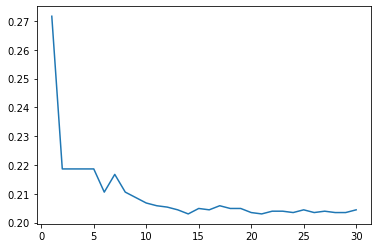

In [87]:
plt.plot(range(1,31), error_rates);

In [88]:
# there is a error rate of 27%. with increase in stumps, error rates decreases 
# as we see from graph
# upto 14 stumps there is decrease in error rates, beyond 14 stumps there is no
# appreciable decrease in error rate

#### 1. adaboost accuracy is more than random forest and decision tree model.
#### 2. there is well balance between test score and train score
#### 3. important feature is 'tenure


### Gradient boosting

In [89]:
from sklearn.ensemble import GradientBoostingClassifier

In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
gb_model = GradientBoostingClassifier()

In [92]:
gb_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [93]:
y_predictions = gb_model.predict(X_test)

In [94]:
y_predictions

array(['Yes', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [95]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [96]:
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

          No       0.83      0.91      0.87      1539
         Yes       0.68      0.52      0.59       574

    accuracy                           0.80      2113
   macro avg       0.76      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113



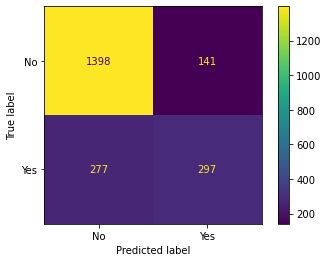

In [97]:
plot_confusion_matrix(gb_model, X_test, y_test);

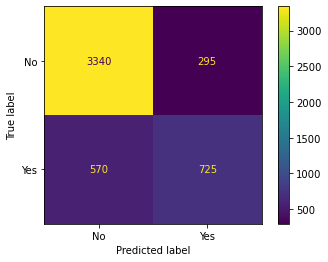

In [98]:
plot_confusion_matrix(gb_model, X_train, y_train)

In [99]:
gb_model.score(X_train, y_train)

0.8245436105476673

In [100]:
gb_model.score(X_test, y_test)

0.8021769995267393

#### Accuracy is similar to adaboost
#### there is well balance between test and train score

### Conclusions
1. import feature among all is tenure
2. accuracy is more for boosting techniques
3. there is well balanced test and train score in adaboost and gradient boosting
4. pruning the trees in decision tree has increase the accuracy and there is also a reduction in overfitting
5. overall accuracy is better in adaboost and gradient boosting than compare to decision tree and randomforest 
6. The overall misclassification for churn is 18%